In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import gaussian_kde
from scipy.stats import ttest_ind
from glob import glob
import h5py

types = ['WT', 'Y132F', 'G135D']

In [2]:
base_dir = '../run_sims/spacing/'

## max N clustered

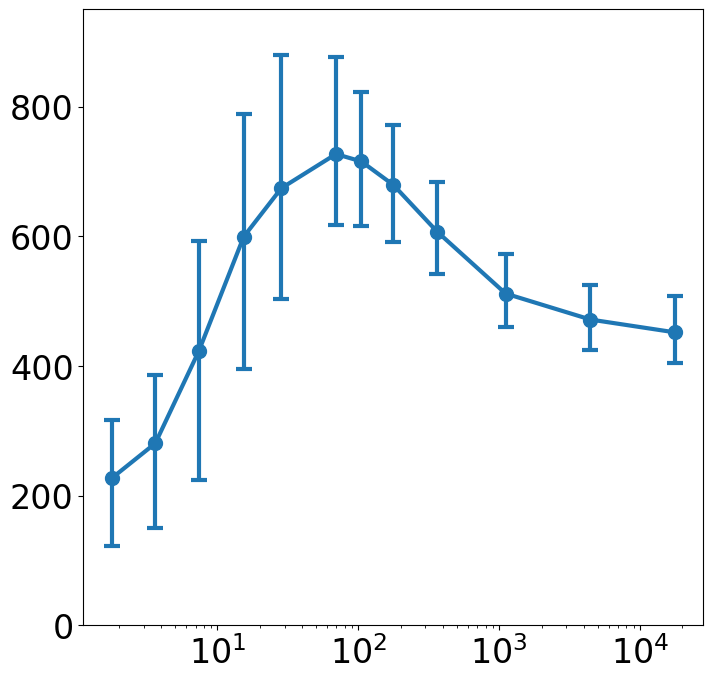

In [4]:
box_widths = [1,2,4,7,10,13,16,25,34,49,70,100]
density_max_nclust = pd.read_csv(f'{base_dir}spacing_max_clustered_distr.csv',index_col=0)

sizes = np.zeros([len(box_widths)])
errors = np.zeros([2,len(box_widths)])
for i,w in enumerate(box_widths):
    sizes[i] = np.mean(density_max_nclust[f'width{w}'])
    errors[0,i] = np.quantile(density_max_nclust[f'width{w}'],0.25)
    errors[1,i] = np.quantile(density_max_nclust[f'width{w}'],0.75)

plt.figure(figsize=[8,8])
plt.errorbar(16/(0.03*np.array(box_widths))**2,sizes,yerr=np.abs(errors-sizes),
                 capsize=6,linewidth=3,markersize=10,elinewidth=3,capthick=3,fmt='o-')
plt.semilogx()
plt.ylim([0,950])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.savefig('max_clustered_vs_spacing.png',dpi=1000,bbox_inches='tight')

In [5]:
16/(0.03*np.array(box_widths))**2

array([1.77777778e+04, 4.44444444e+03, 1.11111111e+03, 3.62811791e+02,
       1.77777778e+02, 1.05193951e+02, 6.94444444e+01, 2.84444444e+01,
       1.53787005e+01, 7.40432227e+00, 3.62811791e+00, 1.77777778e+00])